# Tweets sentiment analysis

### Importing the libraries

In [1]:
import random
from numpy.random import seed
import tensorflow as tf
import time
SEED = 32
SEED = int(time.time())
random.seed(SEED)
seed(SEED)
tf.random.set_seed(SEED)

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
import os
#os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [3]:
import random
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, GaussianNoise
from tensorflow.keras.layers import BatchNormalization as BN
from tensorflow.keras.layers import GaussianNoise as GN
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import LearningRateScheduler as LRS
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold

#MANAGEMENT PURPOSES ONLY-
from tqdm.notebook import tqdm
import gc
gc.collect()

0

### Load data

In [4]:
data_filepath = 'data'
images_filenames = [x[2] for x in os.walk(os.path.join(data_filepath, 'profile_matrices'))][0]


In [5]:
X = []
for i in range(len(images_filenames)):
    X.append(np.load(os.path.join(data_filepath, 'profile_matrices_word2vec', str(i)+'.npy')))

In [6]:
y = np.load('./data/y.npy')

In [7]:
X[0].shape

(200, 200)

In [8]:
len(X)

420

In [9]:
len(y)

420

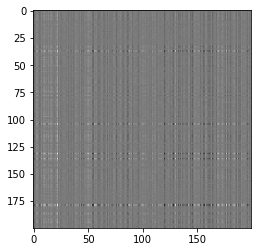

In [10]:
plt.imshow(X[0], cmap='gray')

In [11]:
X[0].shape

(200, 200)

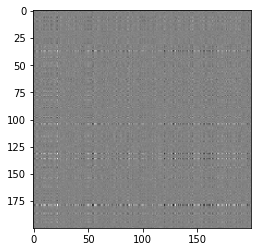

In [12]:
plt.imshow(X[0]-X[1], cmap='gray')

In [13]:
#plt.imshow(resize_image((X[0]-X[326])[0], desired_size=20)[0], cmap='gray')

In [14]:
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
min_lr = 1e-9
EPOCHS = 100

In [15]:
optimiser = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9)
num_classes = 2

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=min_lr)

In [17]:
def build_model(input_shape):
    model = Sequential()
    
    model.add(Dense(1024, input_dim=input_shape, activation='relu'))
    
    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))

    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))

    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimiser,
              metrics=['accuracy'])
    model.summary()

    # checkpoint = ModelCheckpoint('best_model.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')
    
    return model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = np.mean(X_train, axis=1)
X_test = np.mean(X_test, axis=1)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [19]:
X_train.shape

(378, 200)

In [20]:
y_train.shape

(378, 2)

In [21]:
model = build_model(X_train.shape[1])

history=model.fit(X_train, y_train,
                  steps_per_epoch=len(X_train) / BATCH_SIZE, 
                  epochs=EPOCHS,
                  validation_data=(X_test, y_test),
                  callbacks=[reduce_lr],
                  verbose=1)

## TEST
scores = model.evaluate(X_test, y_test, verbose=1)

Metal device set to: Apple M1


2022-05-17 19:13:53.584390: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-17 19:13:53.584613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              205824    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
gaussian_noise (GaussianNois (None, 1024)              0         
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4

2022-05-17 19:13:54.256179: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-17 19:13:54.257065: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-17 19:13:54.602549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 4s 85ms/step - loss: 0.6564 - accuracy: 0.6667 - val_loss: 0.7802 - val_accuracy: 0.3333
Epoch 2/100
 1/11 [=>............................] - ETA: 0s - loss: 0.4613 - accuracy: 0.7812

2022-05-17 19:13:58.187637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 32ms/step - loss: 0.3762 - accuracy: 0.8307 - val_loss: 0.7898 - val_accuracy: 0.3333
Epoch 3/100
11/11 [==============================] - 0s 32ms/step - loss: 0.3555 - accuracy: 0.8492 - val_loss: 0.6998 - val_accuracy: 0.4048
Epoch 4/100
11/11 [==============================] - 0s 31ms/step - loss: 0.2933 - accuracy: 0.8915 - val_loss: 0.7090 - val_accuracy: 0.4762
Epoch 5/100
11/11 [==============================] - 0s 30ms/step - loss: 0.2352 - accuracy: 0.9233 - val_loss: 0.6782 - val_accuracy: 0.4762
Epoch 6/100
11/11 [==============================] - 0s 30ms/step - loss: 0.2485 - accuracy: 0.9153 - val_loss: 0.5579 - val_accuracy: 0.8571
Epoch 7/100
11/11 [==============================] - 0s 31ms/step - loss: 0.2062 - accuracy: 0.9286 - val_loss: 0.5460 - val_accuracy: 0.8571
Epoch 8/100
11/11 [==============================] - 0s 31ms/step - loss: 0.1762 - accuracy: 0.9392 - val_loss: 0.5161 - val_accuracy: 0.8571
Epoch 9/100
11/11 

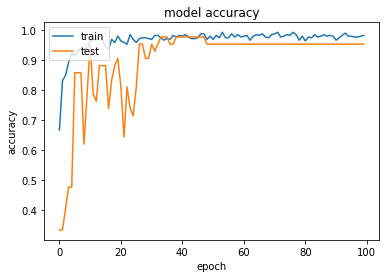

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:

folds = 5
kfold = StratifiedKFold(n_splits=folds, shuffle=True)
X = np.array(X)
y = np.array(y)
cv_accuracies = []
for index, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    print(f"Training fold {index+1}/{folds}")
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    X_train = np.mean(X_train, axis=1)
    X_test = np.mean(X_test, axis=1)
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)
    
    model = build_model(X_train.shape[1])
    
    history=model.fit(X_train, y_train,
                  steps_per_epoch=len(X_train) / BATCH_SIZE, 
                  epochs=EPOCHS,
                  validation_data=(X_test, y_test),
                  callbacks=[reduce_lr],
                  verbose=1)

    ## TEST
    scores = model.evaluate(X_test, y_test, verbose=1)
    cv_accuracies.append(scores[1])
    
    del X_train
    del X_test
    del y_train
    del y_test
    gc.collect()
print(np.mean(cv_accuracies), "+/-", np.std(cv_accuracies))

Training fold 1/5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              205824    
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
gaussian_noise_5 (GaussianNo (None, 1024)              0         
_________________________________________________________________
activation_6 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_6 (Batch (None, 

2022-05-17 19:14:34.600645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 62ms/step - loss: 0.8388 - accuracy: 0.5327 - val_loss: 0.7100 - val_accuracy: 0.5000
Epoch 2/100
 3/10 [=======>......................] - ETA: 0s - loss: 0.7669 - accuracy: 0.5625

2022-05-17 19:14:35.335157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 33ms/step - loss: 0.9101 - accuracy: 0.4732 - val_loss: 0.7125 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 0s 32ms/step - loss: 0.8993 - accuracy: 0.4851 - val_loss: 0.7169 - val_accuracy: 0.5238
Epoch 4/100
10/10 [==============================] - 0s 32ms/step - loss: 0.8927 - accuracy: 0.4911 - val_loss: 0.7192 - val_accuracy: 0.5238
Epoch 5/100
10/10 [==============================] - 0s 32ms/step - loss: 0.8773 - accuracy: 0.5119 - val_loss: 0.7216 - val_accuracy: 0.5119
Epoch 6/100
10/10 [==============================] - 0s 32ms/step - loss: 0.8955 - accuracy: 0.4792 - val_loss: 0.7288 - val_accuracy: 0.4762
Epoch 7/100
10/10 [==============================] - 0s 33ms/step - loss: 0.9110 - accuracy: 0.4940 - val_loss: 0.7433 - val_accuracy: 0.3810
Epoch 8/100
10/10 [==============================] - 0s 32ms/step - loss: 0.9165 - accuracy: 0.4732 - val_loss: 0.7562 - val_accuracy: 0.3095
Epoch 9/100
10/10 

2022-05-17 19:15:10.000346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 53ms/step - loss: 0.8791 - accuracy: 0.4881 - val_loss: 0.7737 - val_accuracy: 0.5000
Epoch 2/100
 3/10 [=======>......................] - ETA: 0s - loss: 0.8334 - accuracy: 0.5208

2022-05-17 19:15:10.636031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 34ms/step - loss: 0.8634 - accuracy: 0.5119 - val_loss: 0.7719 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 0s 34ms/step - loss: 0.9450 - accuracy: 0.4732 - val_loss: 0.7715 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 0s 33ms/step - loss: 0.8485 - accuracy: 0.5060 - val_loss: 0.7693 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 0s 33ms/step - loss: 0.8536 - accuracy: 0.4970 - val_loss: 0.7688 - val_accuracy: 0.5238
Epoch 6/100
10/10 [==============================] - 0s 35ms/step - loss: 0.8928 - accuracy: 0.5119 - val_loss: 0.7710 - val_accuracy: 0.5476
Epoch 7/100
10/10 [==============================] - 0s 32ms/step - loss: 0.8616 - accuracy: 0.5000 - val_loss: 0.7745 - val_accuracy: 0.4762
Epoch 8/100
10/10 [==============================] - 0s 32ms/step - loss: 0.8694 - accuracy: 0.5119 - val_loss: 0.7736 - val_accuracy: 0.4762
Epoch 9/100
10/10 

2022-05-17 19:15:45.661134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 54ms/step - loss: 0.9359 - accuracy: 0.4613 - val_loss: 0.7486 - val_accuracy: 0.5000
Epoch 2/100
 3/10 [=======>......................] - ETA: 0s - loss: 0.8595 - accuracy: 0.4688

2022-05-17 19:15:46.308513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 35ms/step - loss: 0.9282 - accuracy: 0.4315 - val_loss: 0.7382 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 0s 34ms/step - loss: 0.8701 - accuracy: 0.4940 - val_loss: 0.7310 - val_accuracy: 0.5952
Epoch 4/100
10/10 [==============================] - 0s 34ms/step - loss: 0.9083 - accuracy: 0.4732 - val_loss: 0.7242 - val_accuracy: 0.5952
Epoch 5/100
10/10 [==============================] - 0s 34ms/step - loss: 0.9130 - accuracy: 0.4970 - val_loss: 0.7125 - val_accuracy: 0.5833
Epoch 6/100
10/10 [==============================] - 0s 33ms/step - loss: 0.9216 - accuracy: 0.4613 - val_loss: 0.7017 - val_accuracy: 0.5357
Epoch 7/100
10/10 [==============================] - 0s 33ms/step - loss: 0.9380 - accuracy: 0.4315 - val_loss: 0.6972 - val_accuracy: 0.4524
Epoch 8/100
10/10 [==============================] - 0s 35ms/step - loss: 0.8974 - accuracy: 0.4792 - val_loss: 0.6997 - val_accuracy: 0.4881
Epoch 9/100
10/10 

2022-05-17 19:16:23.147563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 57ms/step - loss: 0.9401 - accuracy: 0.4464 - val_loss: 0.8695 - val_accuracy: 0.5000
Epoch 2/100
 3/10 [=======>......................] - ETA: 0s - loss: 0.8059 - accuracy: 0.5104

2022-05-17 19:16:23.818948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 35ms/step - loss: 0.9388 - accuracy: 0.4792 - val_loss: 0.8477 - val_accuracy: 0.5119
Epoch 3/100
10/10 [==============================] - 0s 35ms/step - loss: 0.9622 - accuracy: 0.4286 - val_loss: 0.8293 - val_accuracy: 0.5476
Epoch 4/100
10/10 [==============================] - 0s 34ms/step - loss: 1.0124 - accuracy: 0.4435 - val_loss: 0.8140 - val_accuracy: 0.5357
Epoch 5/100
10/10 [==============================] - 0s 35ms/step - loss: 0.9422 - accuracy: 0.4494 - val_loss: 0.8013 - val_accuracy: 0.5119
Epoch 6/100
10/10 [==============================] - 0s 34ms/step - loss: 0.9782 - accuracy: 0.4345 - val_loss: 0.7855 - val_accuracy: 0.4524
Epoch 7/100
10/10 [==============================] - 0s 34ms/step - loss: 0.9381 - accuracy: 0.4821 - val_loss: 0.7746 - val_accuracy: 0.3810
Epoch 8/100
10/10 [==============================] - 0s 34ms/step - loss: 0.9686 - accuracy: 0.4375 - val_loss: 0.7641 - val_accuracy: 0.3571
Epoch 9/100
10/10 

2022-05-17 19:17:00.799984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 60ms/step - loss: 0.8577 - accuracy: 0.4970 - val_loss: 0.6954 - val_accuracy: 0.5714
Epoch 2/100
 1/10 [=>............................] - ETA: 0s - loss: 0.8721 - accuracy: 0.5625

2022-05-17 19:17:01.514101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 37ms/step - loss: 0.8298 - accuracy: 0.5268 - val_loss: 0.6984 - val_accuracy: 0.5833
Epoch 3/100
10/10 [==============================] - 0s 37ms/step - loss: 0.8348 - accuracy: 0.5119 - val_loss: 0.7054 - val_accuracy: 0.5952
Epoch 4/100
10/10 [==============================] - 0s 37ms/step - loss: 0.7962 - accuracy: 0.4881 - val_loss: 0.7071 - val_accuracy: 0.5952
Epoch 5/100
10/10 [==============================] - 0s 36ms/step - loss: 0.7954 - accuracy: 0.5238 - val_loss: 0.7007 - val_accuracy: 0.5833
Epoch 6/100
10/10 [==============================] - 0s 37ms/step - loss: 0.8314 - accuracy: 0.4970 - val_loss: 0.6936 - val_accuracy: 0.5476
Epoch 7/100
10/10 [==============================] - 0s 37ms/step - loss: 0.8681 - accuracy: 0.4643 - val_loss: 0.6967 - val_accuracy: 0.5714
Epoch 8/100
10/10 [==============================] - 0s 36ms/step - loss: 0.8330 - accuracy: 0.5595 - val_loss: 0.6973 - val_accuracy: 0.5476
Epoch 9/100
10/10 

In [24]:
cv_accuracies


[0.5, 0.5833333730697632, 0.2857142984867096, 0.380952388048172, 0.5]